In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import scipy.stats as st
plt.rc('figure',figsize=(20,6))

Populating the interactive namespace from numpy and matplotlib


***The Data Set provided by Sananter Bank has lot of missing values. The original data set was cleaned and written  to a CSV file. Since loading the original data and cleaning it every time is time consuming, the data cleaning code is seperated from EDA code . For EDA the data is read from clean CSV file ***

In [2]:
df=pd.read_csv('/Users/sowmyamoka/Satish_Python/Capstone_Projects/Cleaned_Data/Cleaned_Data.csv')

*** The information from Account_opening_date  and Customer<6months  can be inferred from  customer age column***

*** The Column 'Unnamed:0' is index from the original data set provided by Sananter ***

*** These three columns are removed for further analysis ***

In [3]:
del(df['Unnamed: 0'])
del(df['Account_Opening_Date']) 
del(df['Customer<6_months'])  

In [4]:
df.columns

Index(['Partition_Column', 'Customer_code', 'Employee_index',
       'Country_residence', 'Customer_ sex', 'Age', 'Customer_seniority',
       '1_99_Prime_Mo_S_E', 'Cust_type_beg_mon', 'Cust_rel_type_beg_mon',
       'Residence_index', 'Foreigner_index', 'channel_to_join',
       'Deceased_index', 'Province_name', 'Activity_index',
       'Gross_income_household', 'segmentation', 'Saving_Account',
       'Guarantees', 'Current_Accounts', 'Derivada_Account', 'Payroll_Account',
       'Junior_Account', 'Más_particular_Account', 'particular_Account',
       'particular_Plus_Account', 'Short_term_depos', 'Medium_term_depos',
       'Long_term_depos', 'e-account', 'Funds', 'Mortgage', 'Pensions_1',
       'Loans', 'Taxes', 'Credit_Card', 'Securities', 'Home_Account',
       'Payroll', 'Pensions_2', 'Direct_Debit', 'Total_products',
       'Total_products_max'],
      dtype='object')

In [5]:
def data_features(data_frame): # code for writing dtype,nullvalues, unique values in each column.
    list_dem_column= list()
    list_dem_null= list()
    list_dem_dtype=list()
    list_dem_unique=list()
    for i in data_frame.columns:
        list_dem_column.append(i)
        list_dem_null.append(data_frame[i].isnull().sum())
        list_dem_dtype.append(data_frame[i].dtype)
        list_dem_unique.append(data_frame[i].unique())
        dict_features= {'column':list_dem_column,'null':list_dem_null,'dtype':list_dem_dtype,'unique':list_dem_unique}
    return  pd.DataFrame(dict_features)

In [6]:
data_features(df.ix[:,0:19])

,column,dtype,null,unique
0,Partition_Column,object,0,"[2015-01-28, 2015-02-28, 2015-03-28, 2015-04-2..."
1,Customer_code,int64,0,"[1375586, 1050611, 1050612, 1050613, 1050614, ..."
2,Employee_index,object,0,"[N, A, B, F, S]"
3,Country_residence,object,0,"[ES, CA, CH, CL, IE, AT, NL, FR, GB, DE, DO, B..."
4,Customer_ sex,object,0,"[H, V]"
5,Age,int64,0,"[35, 23, 22, 24, 65, 28, 25, 26, 53, 27, 32, 3..."
6,Customer_seniority,int64,0,"[6, 35, 34, 33, 31, 21, 16, 27, 9, 22, 13, 29,..."
7,1_99_Prime_Mo_S_E,float64,0,"[1.0, 99.0]"
8,Cust_type_beg_mon,float64,0,"[1.0, 3.0, 2.0, 5.0, 4.0]"
9,Cust_rel_type_beg_mon,object,0,"[A, I, P, R, N]"


In [7]:
list_residency=['Customer_code','Saving_Account',
       'Guarantees', 'Current_Accounts', 'Derivada_Account', 'Payroll_Account',
       'Junior_Account', 'Más_particular_Account', 'particular_Account',
       'particular_Plus_Account', 'Short_term_depos', 'Medium_term_depos',
       'Long_term_depos', 'e-account', 'Funds', 'Mortgage', 'Pensions_1',
       'Loans', 'Taxes', 'Credit_Card', 'Securities', 'Home_Account',
       'Payroll', 'Pensions_2', 'Direct_Debit']
list_residency_2=['Saving_Account',
       'Guarantees', 'Current_Accounts', 'Derivada_Account', 'Payroll_Account',
       'Junior_Account', 'Más_particular_Account', 'particular_Account',
       'particular_Plus_Account', 'Short_term_depos', 'Medium_term_depos',
       'Long_term_depos', 'e-account', 'Funds', 'Mortgage', 'Pensions_1',
       'Loans', 'Taxes', 'Credit_Card', 'Securities', 'Home_Account',
       'Payroll', 'Pensions_2', 'Direct_Debit']

*** The customer product usage data is provided for 17months. To reduce the complexity of visualising the product usage, any product used atleast once by the customer in 17months is taken as product used by him. In-short , each customer's data over multiple months is compressed into one row. ***

In [8]:
# Calculates the percentage of people using each product. 
# groupby('Customer_code')[list_residency_2].max() gives 1 for each product , if it is used atleast once.
#apply(lambda x :(x.sum()/x.count()) calculates the percentage of customers having 1 for each product.

S_Product_counts=df[list_residency].groupby('Customer_code')[list_residency_2].max().apply(lambda x :(x.sum()/x.count()))

In [9]:
# Residency Index S is for people having bank account in the same country they are living in.
# This line calculates the percentage of population using each product 
S_residency_S=df[df['Residence_index']=='S'][list_residency].groupby('Customer_code')[list_residency_2].max().apply(lambda x :(x.sum()/x.count()))

In [10]:
# This line calculates the percentage of population using each product
S_residency_N=df[df['Residence_index']=='N'][list_residency].groupby('Customer_code')[list_residency_2].max().apply(lambda x :(x.sum()/x.count()))

In [11]:
# Creating a dictionary for above series.
dict_residency={'Residency_S':S_residency_S,'Residency_N':S_residency_N,'Overall_Population':S_Product_counts}

In [12]:
# DataFrame for product usage based on residency index
df_Residency=pd.DataFrame(dict_residency)

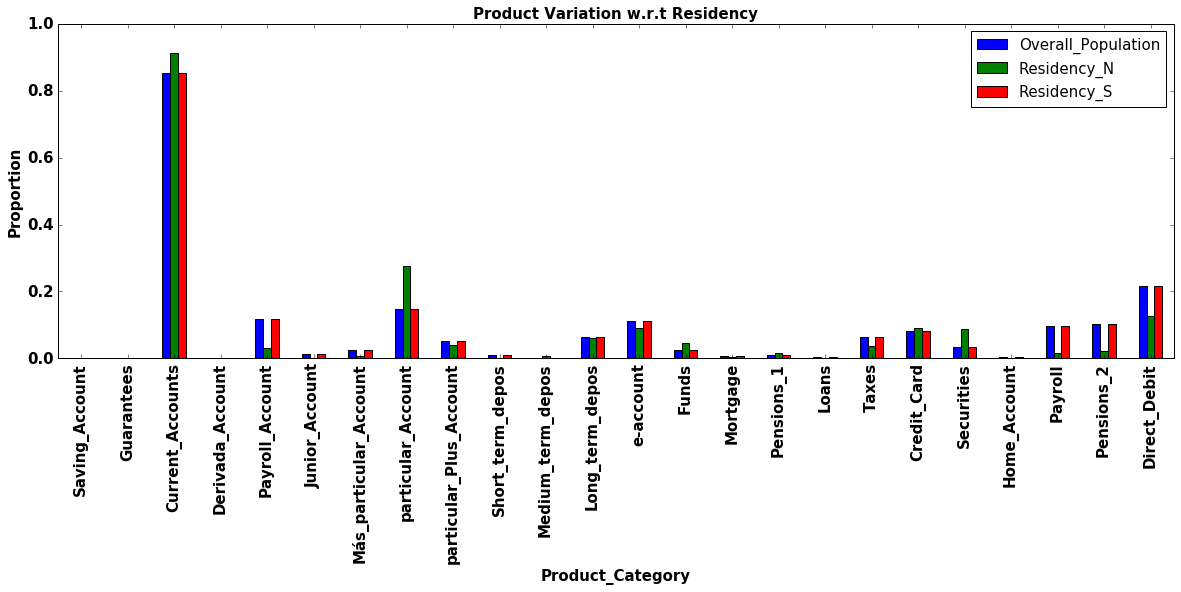

In [13]:
df_Residency.plot(kind='bar',width=0.5)
plt.title('Product Variation w.r.t Residency',fontsize=15,fontweight='bold')
plt.xlabel("Product_Category",fontsize=15,fontweight='bold')
plt.ylabel("Proportion",fontsize=15,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.legend(fontsize=15)


*** The following code generates a histogram to show product usage variation for different categories under segmentation***
*** The Column segmentation has three different categories.-'01-TOP' appears to be high income group '03-UNIVERSITARIO' and '01-TOP'*** 


In [14]:
S_segmentation_PART=df[df['segmentation']=='02 - PARTICULARES'][list_residency].groupby('Customer_code')[list_residency_2].max().apply(lambda x :(x.sum()/x.count()))

In [15]:
S_segmentation_UNIV=df[df['segmentation']=='03 - UNIVERSITARIO'][list_residency].groupby('Customer_code')[list_residency_2].max().apply(lambda x :(x.sum()/x.count()))

In [16]:
S_segmentation_TOP=df[df['segmentation']=='01 - TOP'][list_residency].groupby('Customer_code')[list_residency_2].max().apply(lambda x :(x.sum()/x.count()))

In [17]:
dict_segmentation={'Overall_Population':S_Product_counts,'segment_02':S_segmentation_PART,'segment_03':S_segmentation_UNIV,'segment_01':S_segmentation_TOP}

In [18]:
df_segmentation=pd.DataFrame(dict_segmentation)

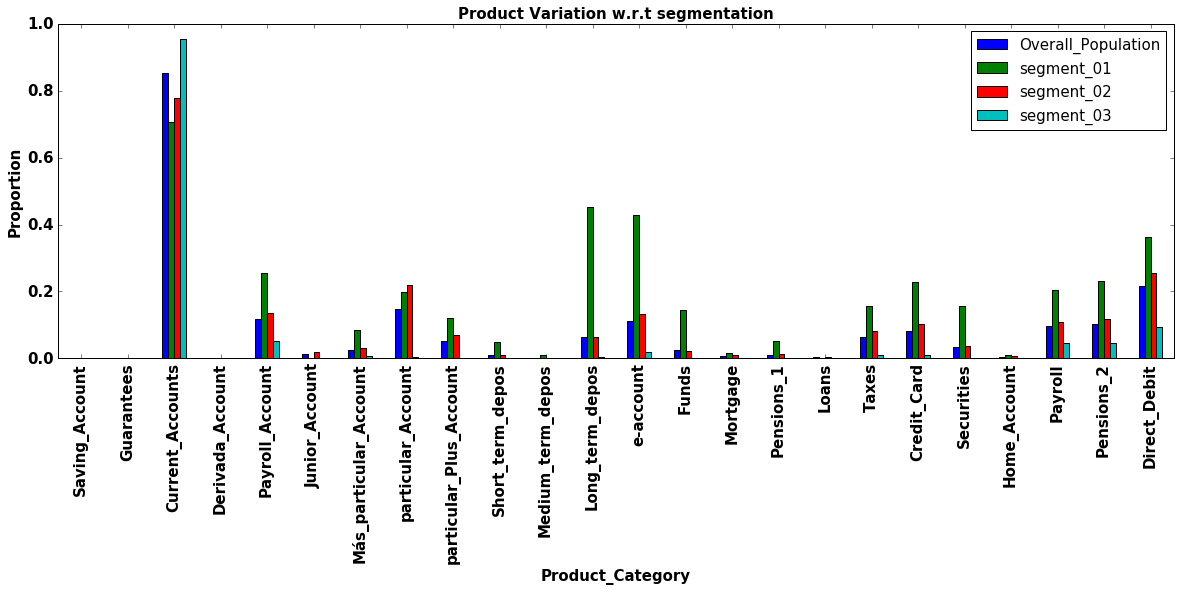

In [19]:
df_segmentation.plot(kind='bar',width=0.5)
plt.title('Product Variation w.r.t segmentation',fontsize=15,fontweight='bold')
plt.xlabel("Product_Category",fontsize=15,fontweight='bold')
plt.ylabel("Proportion",fontsize=15,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.legend(fontsize=15)


*** The following code generates a histogram to show product usage variation for different categories under Employement Index***
*** This Column  has four different categories.- N,A,B,F,S
A active, B ex employed, F filial, N not employee, S pasive***

In [20]:
S_employee_N=df[df['Employee_index']=='N'][list_residency].groupby('Customer_code')[list_residency_2].max().apply(lambda x :(x.sum()/x.count()))

In [21]:
S_employee_A=df[df['Employee_index']=='A'][list_residency].groupby('Customer_code')[list_residency_2].max().apply(lambda x :(x.sum()/x.count()))

In [22]:
S_employee_B=df[df['Employee_index']=='B'][list_residency].groupby('Customer_code')[list_residency_2].max().apply(lambda x :(x.sum()/x.count()))

In [23]:
S_employee_F=df[df['Employee_index']=='F'][list_residency].groupby('Customer_code')[list_residency_2].max().apply(lambda x :(x.sum()/x.count()))

In [24]:
S_employee_S=df[df['Employee_index']=='S'][list_residency].groupby('Customer_code')[list_residency_2].max().apply(lambda x :(x.sum()/x.count()))

In [25]:
dict_Employement={'Overall_Population':S_Product_counts,'Employement_N':S_employee_N,'Employement_A':S_employee_A,'Employement_B':S_employee_B,'Employement_F':S_employee_F,'Employement_S':S_employee_F}

In [26]:
df_Employement=pd.DataFrame(dict_Employement)

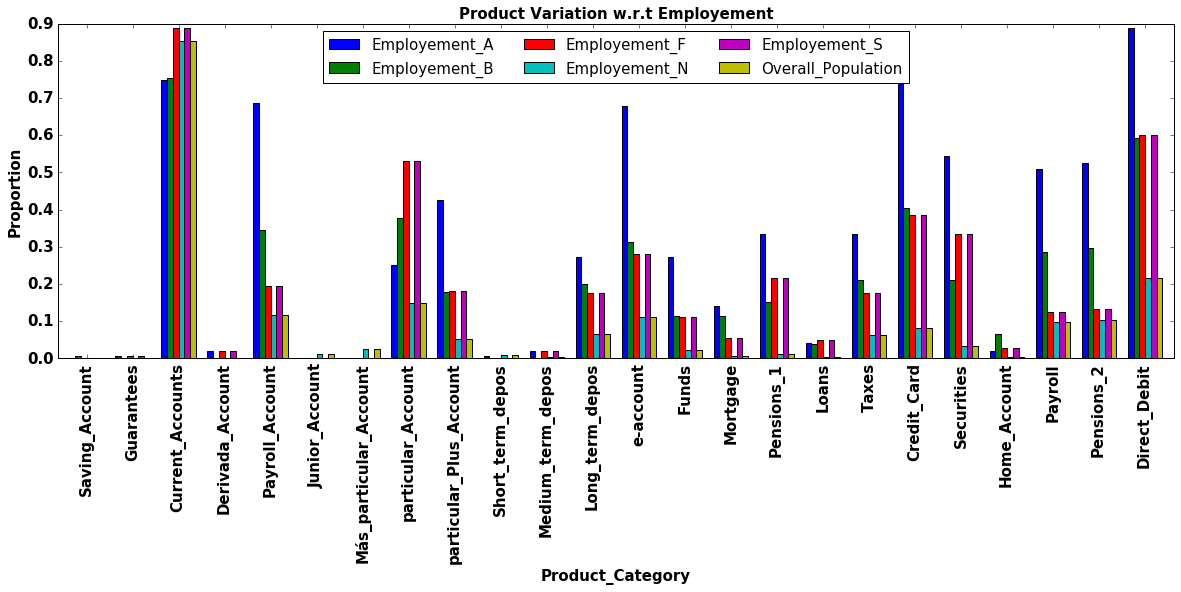

In [27]:
df_Employement.plot(kind='bar',width=0.75)
plt.title('Product Variation w.r.t Employement',fontsize=15,fontweight='bold')
plt.xlabel("Product_Category",fontsize=15,fontweight='bold')
plt.ylabel("Proportion",fontsize=15,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.legend(fontsize=15,loc=0,ncol=3)



*** The following code generates product variation for different sex ***

In [28]:
S_sex_H=df[df['Customer_ sex']=='H'][list_residency].groupby('Customer_code')[list_residency_2].max().apply(lambda x :(x.sum()/x.count()))

In [29]:
S_sex_V=df[df['Customer_ sex']=='V'][list_residency].groupby('Customer_code')[list_residency_2].max().apply(lambda x :(x.sum()/x.count()))

In [30]:
dict_sex={'Overall_Population':S_Product_counts,'Sex_H':S_sex_H,'Sex_V':S_sex_V}

In [31]:
df_dict_sex=pd.DataFrame(dict_sex)

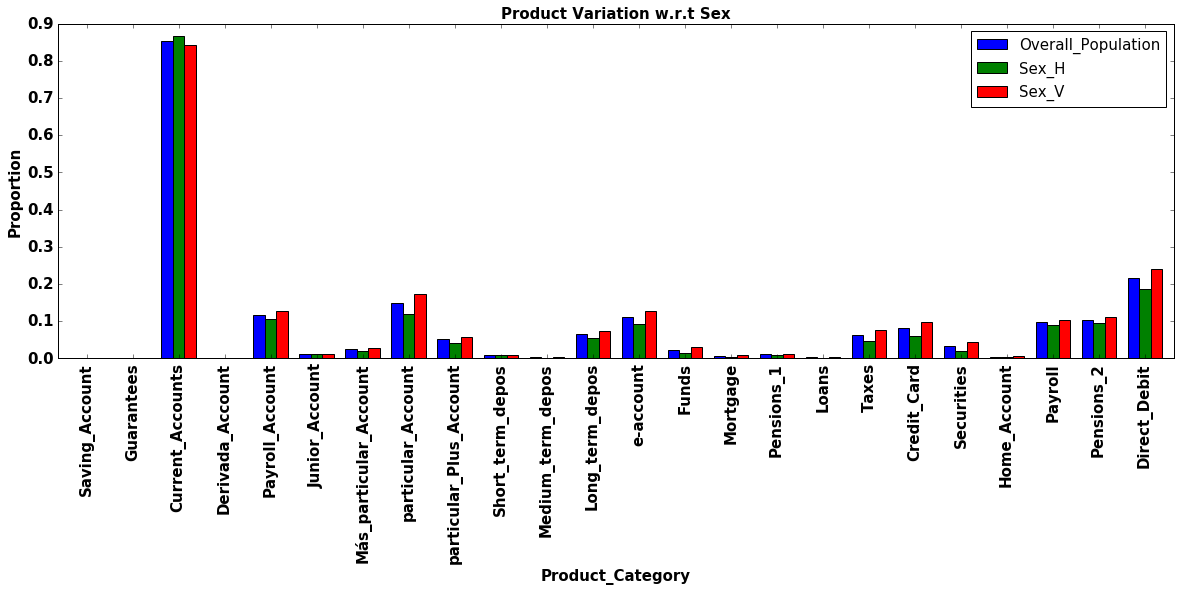

In [32]:
df_dict_sex.plot(kind='bar',width=0.75)
plt.title('Product Variation w.r.t Sex',fontsize=15,fontweight='bold')
plt.xlabel("Product_Category",fontsize=15,fontweight='bold')
plt.ylabel("Proportion",fontsize=15,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.legend(fontsize=15,loc=0,ncol=1)


*** The activity index has two different segments -1 and 0 . The code in this section doesn't calcualte the proportion of customers as in the previous sections, but calculates the percentage of customers having change of product status.***

In [33]:
# This code imputes either 1 or 0 for customer not having change of status and a fraction for those 
#having status change
df_Activity_index_0=df[df['Activity_index']==0.0][list_residency].groupby('Customer_code').apply(lambda x : x.sum()/x.count())[list_residency_2]

In [34]:
#(df_Activity_index_0.isin([0,0.0,1,1.0]).sum(axis=0)/len(df_Activity_index_0['Saving_Account']))
#calculates proportion of customers not having change of status. 
S_Activity_index_0=1-(df_Activity_index_0.isin([0,0.0,1,1.0]).sum(axis=0)/len(df_Activity_index_0['Saving_Account']))

In [35]:
# changing proportion to percentage
S_Activity_index_0 =(S_Activity_index_0)*100


In [36]:
# samiliar code as line 33, but calculates for customers with activity index 1.
df_Activity_index_1=df[df['Activity_index']==1.0][list_residency].groupby('Customer_code').apply(lambda x : x.sum()/x.count())[list_residency_2]

In [37]:
S_Activity_index_1=1-(df_Activity_index_1.isin([0,0.0,1,1.0]).sum(axis=0)/len(df_Activity_index_1['Saving_Account']))

In [38]:
S_Activity_index_1 =(S_Activity_index_1)*100

In [39]:
df_dict_activity=pd.DataFrame({'Activity_code_0':S_Activity_index_0,'Activity_code_1':S_Activity_index_1})

(array([  0.,   5.,  10.,  15.,  20.]), <a list of 5 Text yticklabel objects>)

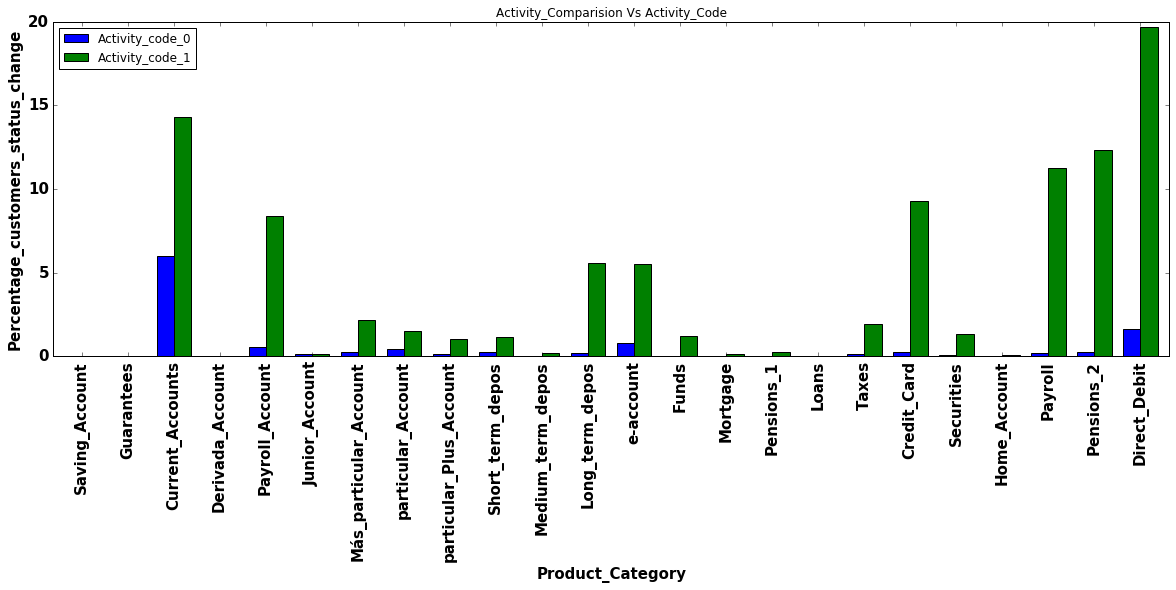

In [40]:
df_dict_activity.plot(kind='bar',width=0.75)
plt.title('Activity_Comparision Vs Activity_Code')
plt.xlabel('Product_Category',fontsize=15,weight='bold')
plt.ylabel('Percentage_customers_status_change' ,fontsize=15,weight='bold')
plt.xticks(fontsize=15,weight='bold')
plt.yticks(fontsize=15,weight='bold')


***From above chart, when Acitivy index is 0.0 the customers are not changing their status.Which is means there is no addition or deletion from their product portfolio.***

In [41]:
## simliar to previous code but does the calculations based on Foreign index.
## 'S' living in the same country as country of birth
##'N' living in the country different than country of birth


S_Foreign_S=df[df['Foreigner_index']=='S'][list_residency].groupby('Customer_code')[list_residency_2].max().apply(lambda x :(x.sum()/x.count()))

In [42]:
S_Foreign_N=df[df['Foreigner_index']=='N'][list_residency].groupby('Customer_code')[list_residency_2].max().apply(lambda x :(x.sum()/x.count()))

In [43]:
dict_Foreigner={'Overall_Population':S_Product_counts,'Foreigner_S':S_Foreign_S,'Foreigner_N':S_Foreign_N}

In [44]:
df_Foreigner=pd.DataFrame(dict_Foreigner)

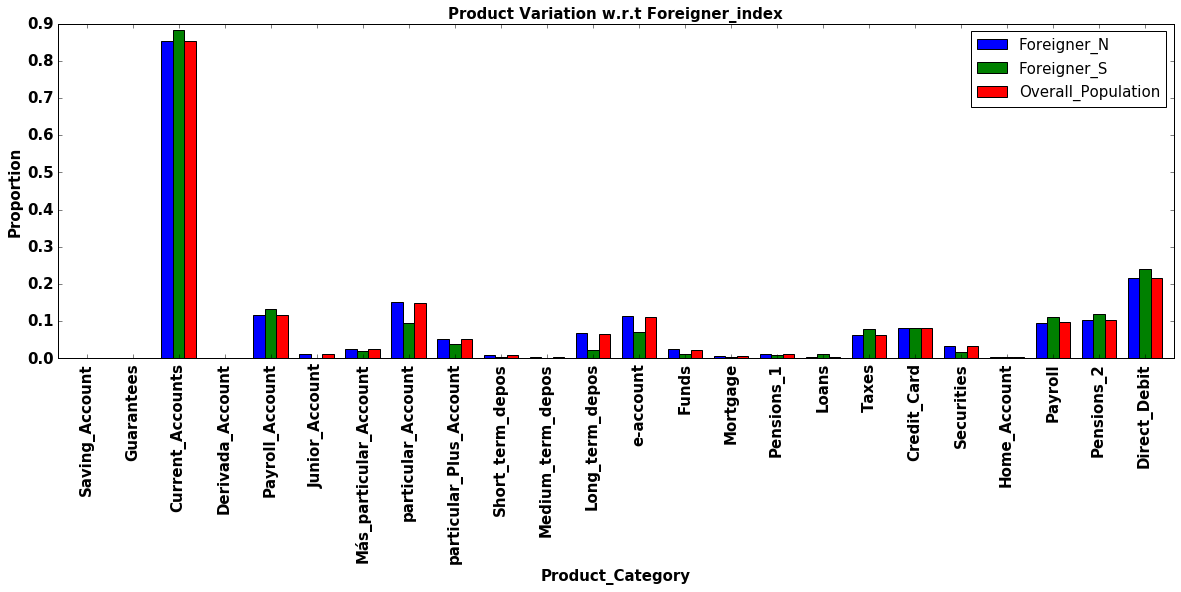

In [45]:
df_Foreigner.plot(kind='bar',width=0.75)
plt.title('Product Variation w.r.t Foreigner_index',fontsize=15,fontweight='bold')
plt.xlabel("Product_Category",fontsize=15,fontweight='bold')
plt.ylabel("Proportion",fontsize=15,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.legend(fontsize=15,loc=0,ncol=1)


*** This section calculates product variation for customers that are primary ( 1.0) and not primary (99.0) ***

In [46]:
S_Primary_S=df[df['1_99_Prime_Mo_S_E']==1.0][list_residency].groupby('Customer_code')[list_residency_2].max().apply(lambda x :(x.sum()/x.count()))

In [47]:
S_Primary_N=df[df['1_99_Prime_Mo_S_E']==99.0][list_residency].groupby('Customer_code')[list_residency_2].max().apply(lambda x :(x.sum()/x.count()))

In [48]:
dict_Primary={'Overall_Population':S_Product_counts,'Primary_1.0':S_Primary_S,'Primary_99.0':S_Primary_N}

In [49]:
df_Primary=pd.DataFrame(dict_Primary)

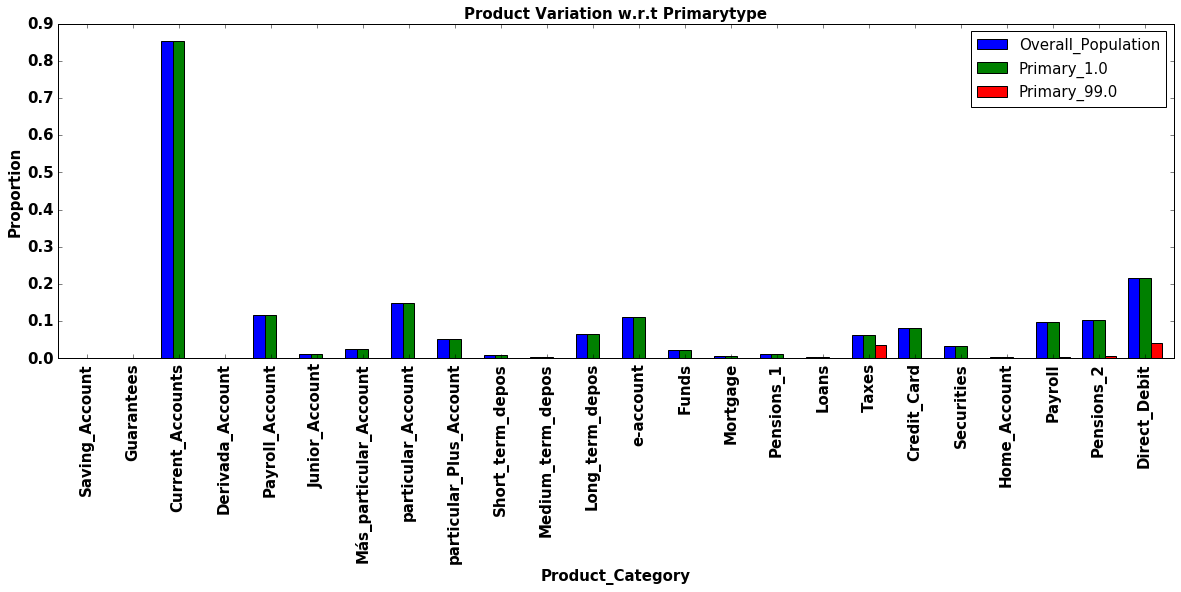

In [50]:
df_Primary.plot(kind='bar',width=0.75)
plt.title('Product Variation w.r.t Primarytype',fontsize=15,fontweight='bold')
plt.xlabel("Product_Category",fontsize=15,fontweight='bold')
plt.ylabel("Proportion",fontsize=15,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.legend(fontsize=15,loc=0,ncol=1)

*** This section creates pi chart based on number of products used by customers ***

In [51]:
S_Products=df[list_residency].groupby('Customer_code')[list_residency_2].max()

In [52]:
S_Products['Total_products']=S_Products.sum(axis=1)

In [53]:
S_Products['Total_products'].value_counts()

1     429991
2     127183
3      54434
4      37164
5      29989
6      19193
7      13347
8       7776
9       3986
10      1705
11       615
12       202
13        54
14         7
15         1
Name: Total_products, dtype: int64

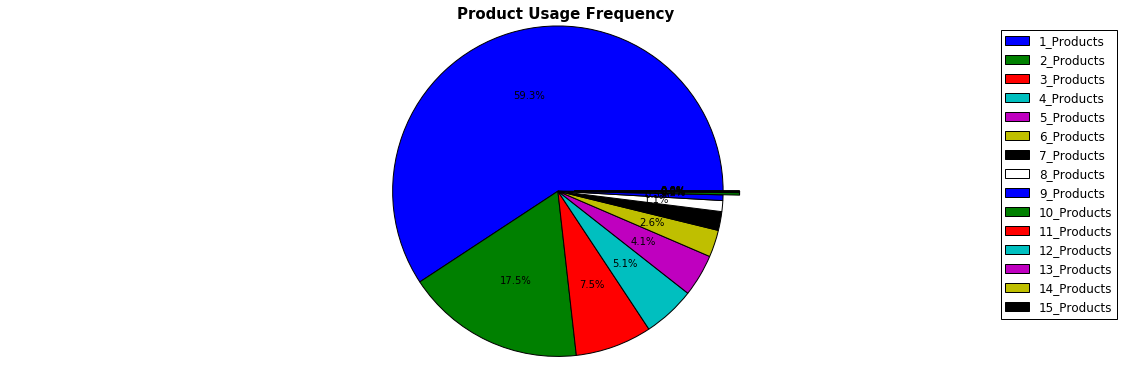

In [54]:
S=['1_Products','2_Products','3_Products','4_Products','5_Products','6_Products','7_Products','8_Products','9_Products','10_Products',
  '11_Products','12_Products','13_Products','14_Products','15_Products']
explode=[0,0,0,0,0,0,0,0,0,1,1,1,1,1,1]
plt.pie(S_Products['Total_products'].value_counts(),explode=explode,startangle=0,radius=10,autopct='%1.1f%%')
plt.axis('equal')
plt.title('Product Usage Frequency',fontsize=15,weight='bold')
plt.legend(S)


(array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06]),
 <a list of 7 Text yticklabel objects>)

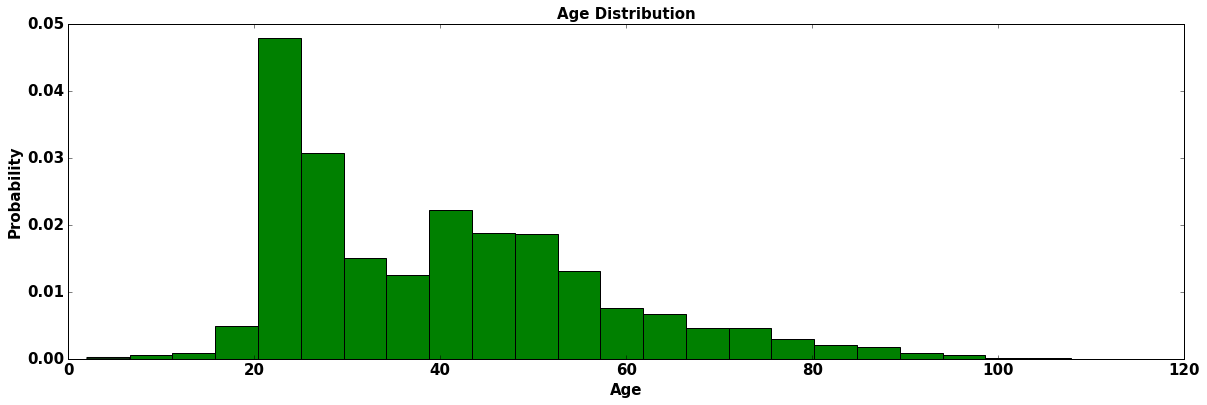

In [55]:
#Age distribution of customers. For simplicty , we took the max age of all the rows for each customer 

plt.hist(df.groupby('Customer_code')['Age'].max(),bins=25,normed=1,color='g')
plt.title('Age Distribution',fontsize=15,weight='bold')
plt.xlabel('Age',fontsize=15,weight='bold')
plt.ylabel('Probability',fontsize=15,weight='bold')
plt.xticks(fontsize=15,weight='bold')
plt.yticks(fontsize=15,weight='bold')


In [56]:
# Calculates variation in customer's income over the given perios of time.
S_income_variation=(df.groupby('Customer_code')['Gross_income_household'].max()-df.groupby('Customer_code')['Gross_income_household'].min())/df.groupby('Customer_code')['Gross_income_household'].min()

In [57]:
# Number of customers not having any change in their income.
len(S_income_variation[S_income_variation==0])

670410

In [58]:
# Number of customers having change in their income over given perios of time 
len(S_income_variation[S_income_variation!=0])

55237

In [59]:
# max income 
df.groupby('Customer_code')['Gross_income_household'].max().max()

28894395.510000002

In [60]:
df.groupby('Customer_code')['Gross_income_household'].max().describe()

count    7.256470e+05
mean     1.260555e+05
std      1.966778e+05
min      1.202730e+03
25%      7.785190e+04
50%      1.094758e+05
75%      1.377528e+05
max      2.889440e+07
Name: Gross_income_household, dtype: float64

(array([  0.00000000e+00,   2.00000000e-06,   4.00000000e-06,
          6.00000000e-06,   8.00000000e-06,   1.00000000e-05,
          1.20000000e-05]), <a list of 7 Text yticklabel objects>)

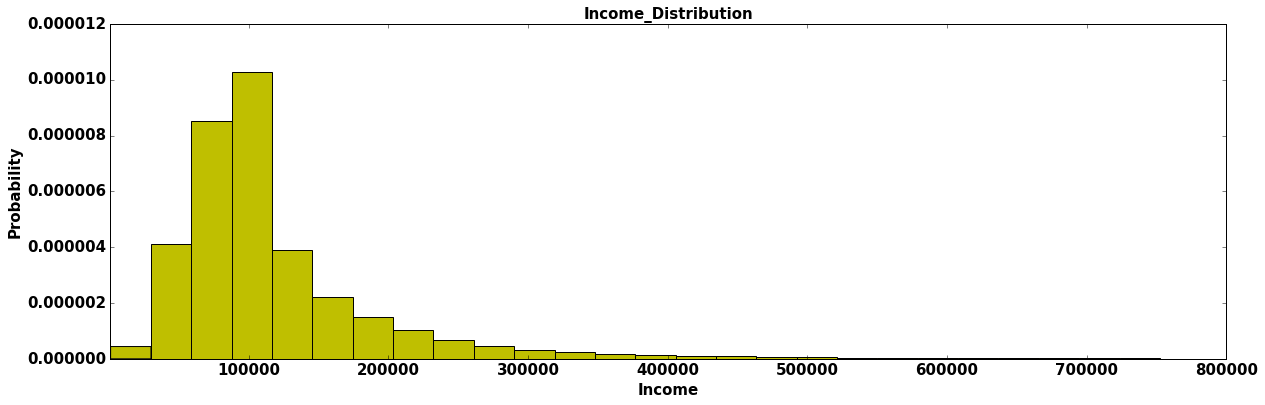

In [61]:
# Income distribution 
plt.hist((df.groupby('Customer_code')['Gross_income_household'].max()),bins=1000,normed=1,color='y')
plt.xlim(1000,800000)
plt.title('Income_Distribution',fontsize=15,weight='bold')
plt.xlabel('Income',fontsize=15,weight='bold')
plt.ylabel('Probability',fontsize=15,weight='bold')
plt.xticks(fontsize=15,weight='bold')
plt.yticks(fontsize=15,weight='bold')

*** Customers are segmented into four buckets based income and the following codes generates product variation across these four income segments ***

In [62]:
S_Income_25=df[df['Gross_income_household']<=7.785190e+04][list_residency].groupby('Customer_code')[list_residency_2].max().apply(lambda x :(x.sum()/x.count()))

In [63]:
S_Income_50=df[(df['Gross_income_household']>7.785190e+04)&(df['Gross_income_household']<=1.094758e+05)][list_residency].groupby('Customer_code')[list_residency_2].max().apply(lambda x :(x.sum()/x.count()))

In [64]:
S_Income_75=df[(df['Gross_income_household']>1.094758e+05)&(df['Gross_income_household']<=1.377528e+05)][list_residency].groupby('Customer_code')[list_residency_2].max().apply(lambda x :(x.sum()/x.count()))

In [65]:
S_Income_100=df[(df['Gross_income_household']>1.377528e+05)][list_residency].groupby('Customer_code')[list_residency_2].max().apply(lambda x :(x.sum()/x.count()))

In [66]:
dict_income={'Overall_Population':S_Product_counts,'Lower_25Pctl':S_Income_25,'25Pctl_to_50Pctl':S_Income_50,'50Pctl_to_75Pctl':S_Income_75,'Above75Pctl':S_Income_100}

In [67]:
df_dict_income=pd.DataFrame(dict_income)

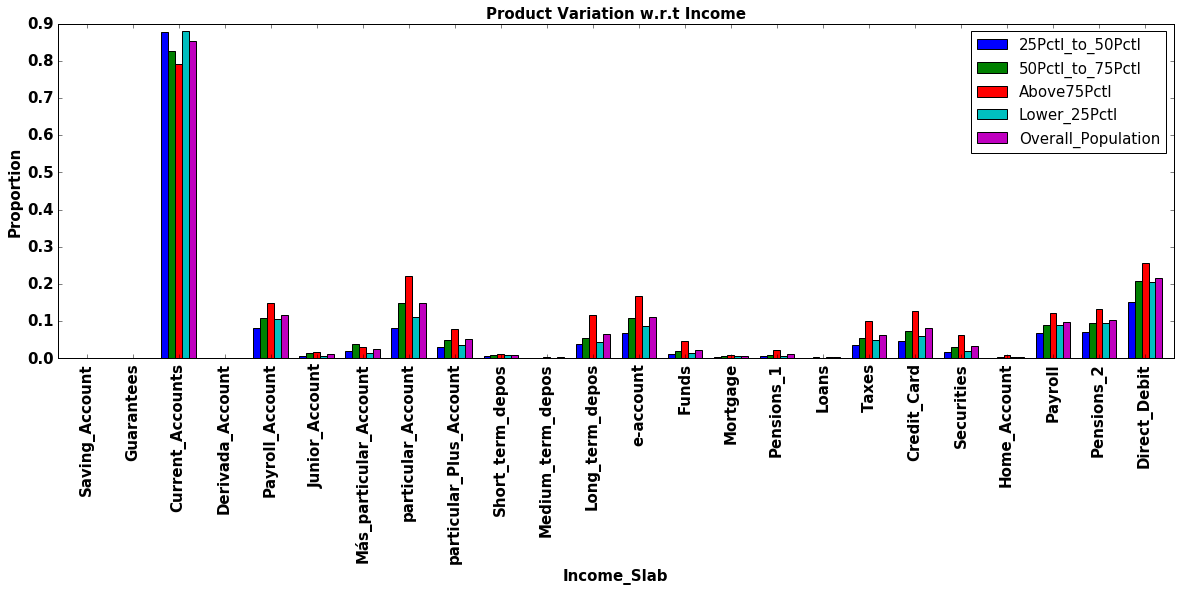

In [68]:
df_dict_income.plot(kind='bar',width=0.75)
plt.title('Product Variation w.r.t Income',fontsize=15,fontweight='bold')
plt.xlabel("Income_Slab",fontsize=15,fontweight='bold')
plt.ylabel("Proportion",fontsize=15,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.legend(fontsize=15,loc=0,ncol=1)

*** The goal of this project is build product recommendation system based on various aspects of customers.***
*** Imagine that there is no data about customers and we have only the product usage, this chart represents the best  product recommendation system that can be built in that scenario***

In [69]:
S_Product_Counts_perlakh=S_Product_counts.sort_values()*100000

(array([     0.,  10000.,  20000.,  30000.,  40000.,  50000.,  60000.,
         70000.,  80000.,  90000.]), <a list of 10 Text yticklabel objects>)

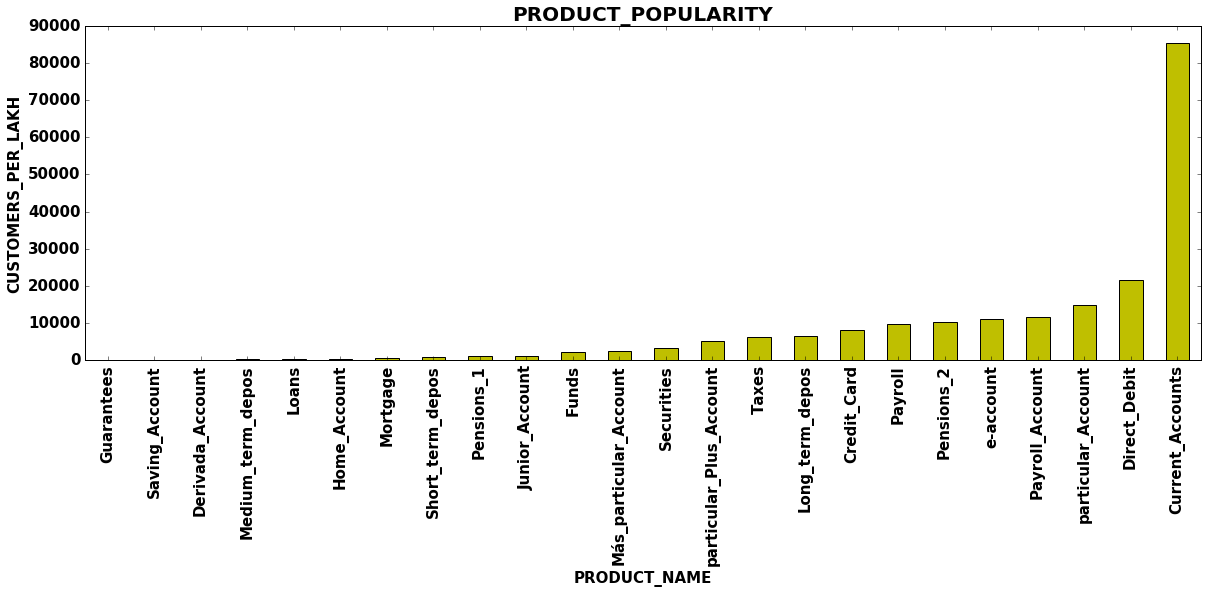

In [70]:
S_Product_Counts_perlakh.plot(kind='bar',color='y')
plt.title('PRODUCT_POPULARITY',fontsize=20,weight='bold')
plt.xlabel('PRODUCT_NAME',fontsize=15,weight='bold')
plt.ylabel('CUSTOMERS_PER_LAKH',fontsize=15,weight='bold')
plt.xticks(fontsize=15,weight='bold')
plt.yticks(fontsize=15,weight='bold')

*** The following code evaluates product usage variation based on customer relation type***

In [71]:
S_Cust_rel_month_A=df[df['Cust_rel_type_beg_mon']=='A'][list_residency].groupby('Customer_code')[list_residency_2].max().apply(lambda x :(x.sum()/x.count()))

In [72]:
S_Cust_rel_month_I=df[df['Cust_rel_type_beg_mon']=='I'][list_residency].groupby('Customer_code')[list_residency_2].max().apply(lambda x :(x.sum()/x.count()))

In [73]:
S_Cust_rel_month_P=df[df['Cust_rel_type_beg_mon']=='P'][list_residency].groupby('Customer_code')[list_residency_2].max().apply(lambda x :(x.sum()/x.count()))

In [74]:
S_Cust_rel_month_R=df[df['Cust_rel_type_beg_mon']=='R'][list_residency].groupby('Customer_code')[list_residency_2].max().apply(lambda x :(x.sum()/x.count()))

In [75]:
df['Partition_Column']=pd.to_datetime(df['Partition_Column'])

In [76]:
dict_Cust_rel_month={'Overall_Population':S_Product_counts,'Customer_rel_A':S_Cust_rel_month_A,'Customer_rel_I':S_Cust_rel_month_I,'Customer_rel_P':S_Cust_rel_month_P,'Customer_rel_R':S_Cust_rel_month_R,}

In [77]:
df_Cust_rel_month=pd.DataFrame(dict_Cust_rel_month)

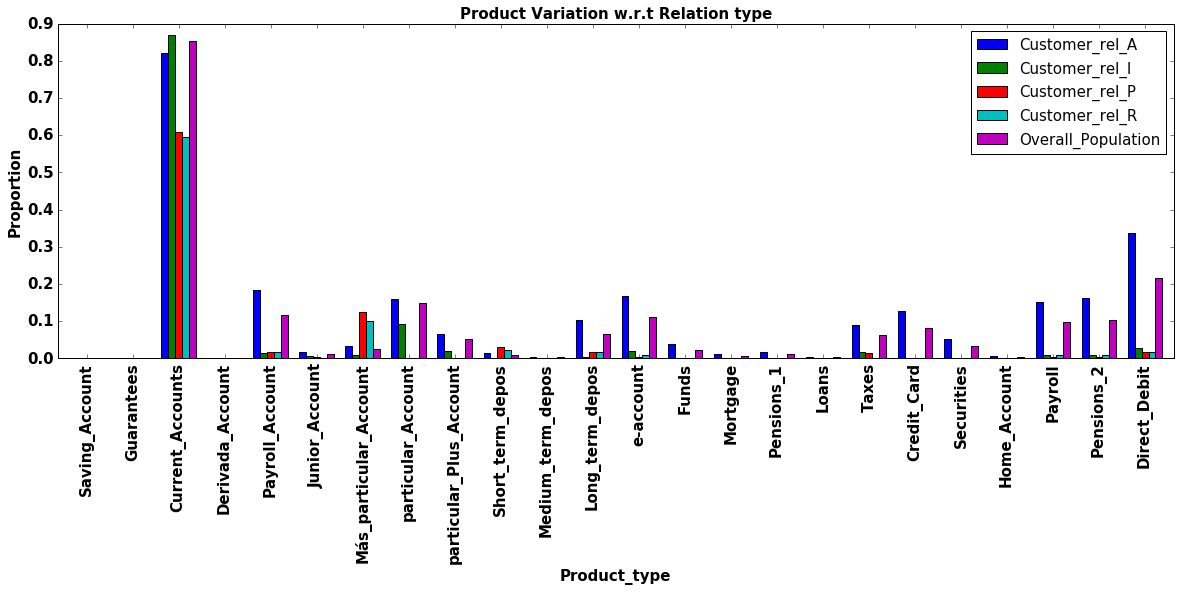

In [78]:
df_Cust_rel_month.plot(kind='bar',width=0.75)
plt.title('Product Variation w.r.t Relation type',fontsize=15,fontweight='bold')
plt.xlabel("Product_type",fontsize=15,fontweight='bold')
plt.ylabel("Proportion",fontsize=15,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.legend(fontsize=15,loc=0,ncol=1)

*** This section evaluates product usage across various months ***

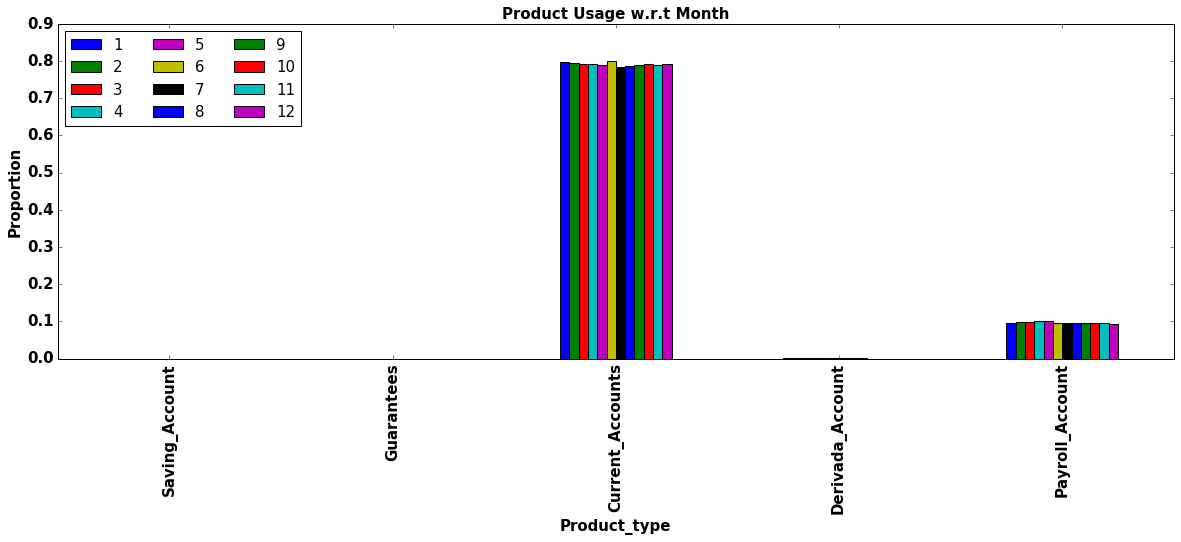

In [79]:
list_residency_3=list_residency_2[0:5]
df.groupby(df['Partition_Column'].dt.month)[list_residency_3].apply(lambda x : x.sum()/x.count()).unstack().unstack().plot(kind='bar')
plt.title('Product Usage w.r.t Month',fontsize=15,fontweight='bold')
plt.xlabel("Product_type",fontsize=15,fontweight='bold')
plt.ylabel("Proportion",fontsize=15,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.legend(fontsize=15,loc=2,ncol=3)

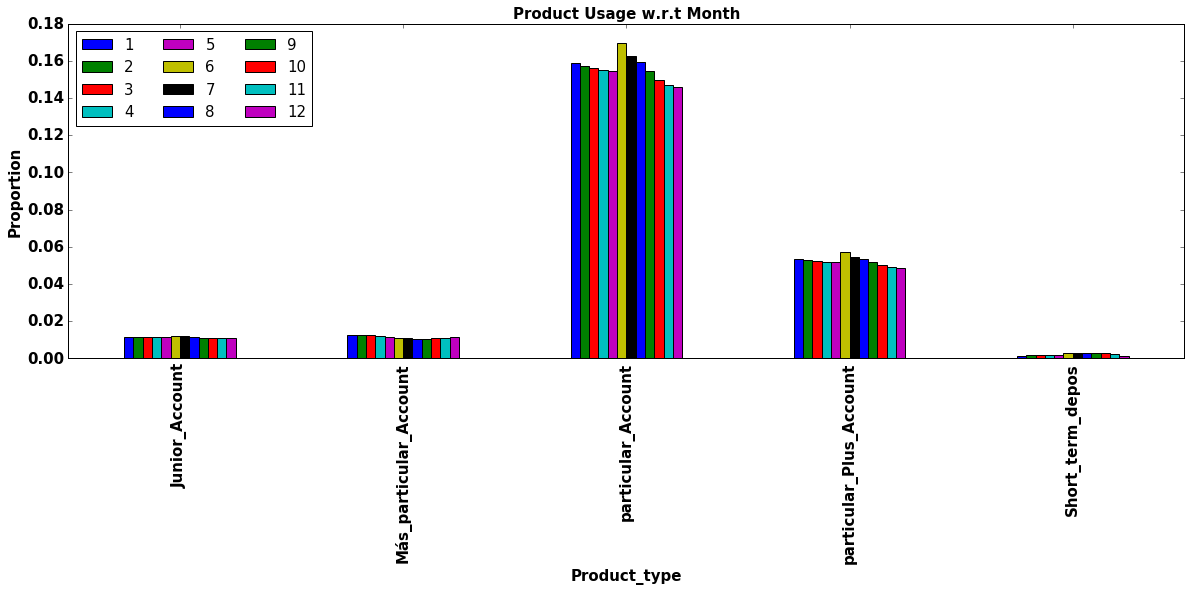

In [80]:
list_residency_4=list_residency_2[5:10]
df.groupby(df['Partition_Column'].dt.month)[list_residency_4].apply(lambda x : x.sum()/x.count()).unstack().unstack().plot(kind='bar')
plt.title('Product Usage w.r.t Month',fontsize=15,fontweight='bold')
plt.xlabel("Product_type",fontsize=15,fontweight='bold')
plt.ylabel("Proportion",fontsize=15,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.legend(fontsize=15,loc=2,ncol=3)

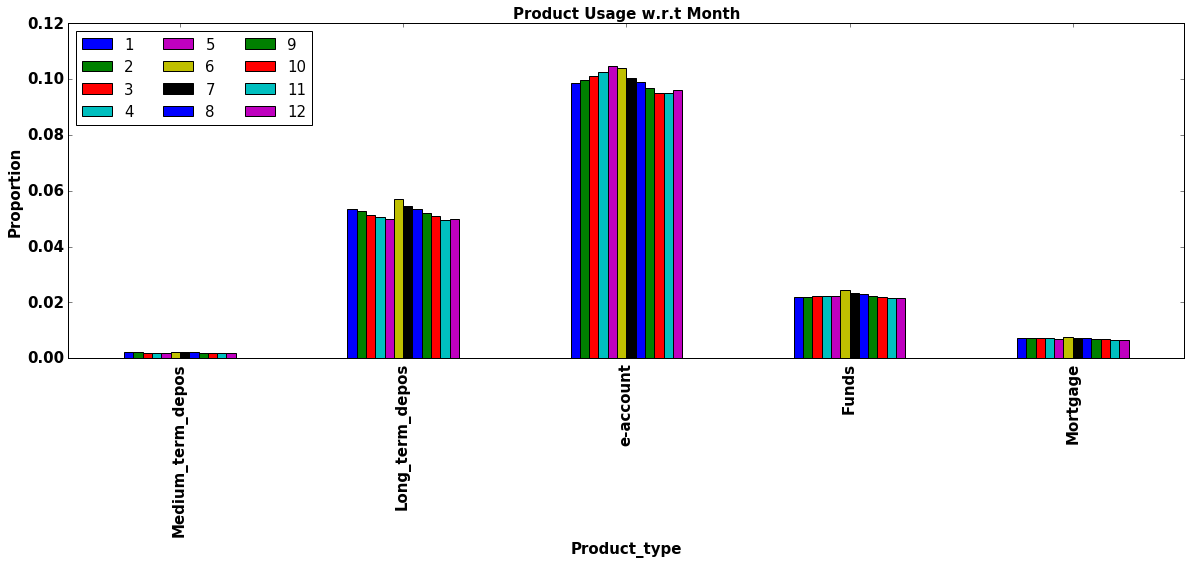

In [81]:
list_residency_5=list_residency_2[10:15]
df.groupby(df['Partition_Column'].dt.month)[list_residency_5].apply(lambda x : x.sum()/x.count()).unstack().unstack().plot(kind='bar')
plt.title('Product Usage w.r.t Month',fontsize=15,fontweight='bold')
plt.xlabel("Product_type",fontsize=15,fontweight='bold')
plt.ylabel("Proportion",fontsize=15,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.legend(fontsize=15,loc=2,ncol=3)

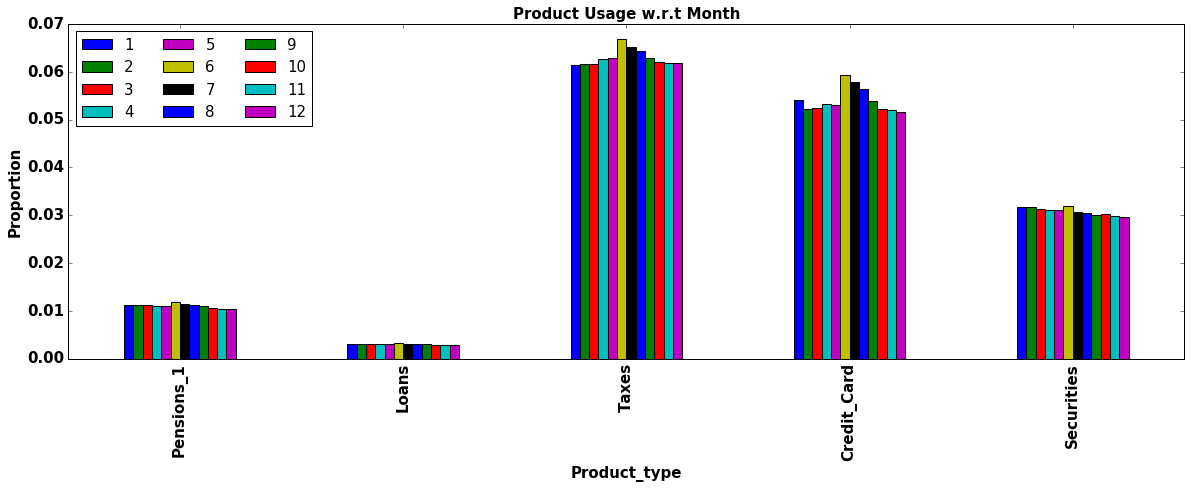

In [82]:
list_residency_6=list_residency_2[15:20]
df.groupby(df['Partition_Column'].dt.month)[list_residency_6].apply(lambda x : x.sum()/x.count()).unstack().unstack().plot(kind='bar')
plt.title('Product Usage w.r.t Month',fontsize=15,fontweight='bold')
plt.xlabel("Product_type",fontsize=15,fontweight='bold')
plt.ylabel("Proportion",fontsize=15,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.legend(fontsize=15,loc=2,ncol=3)

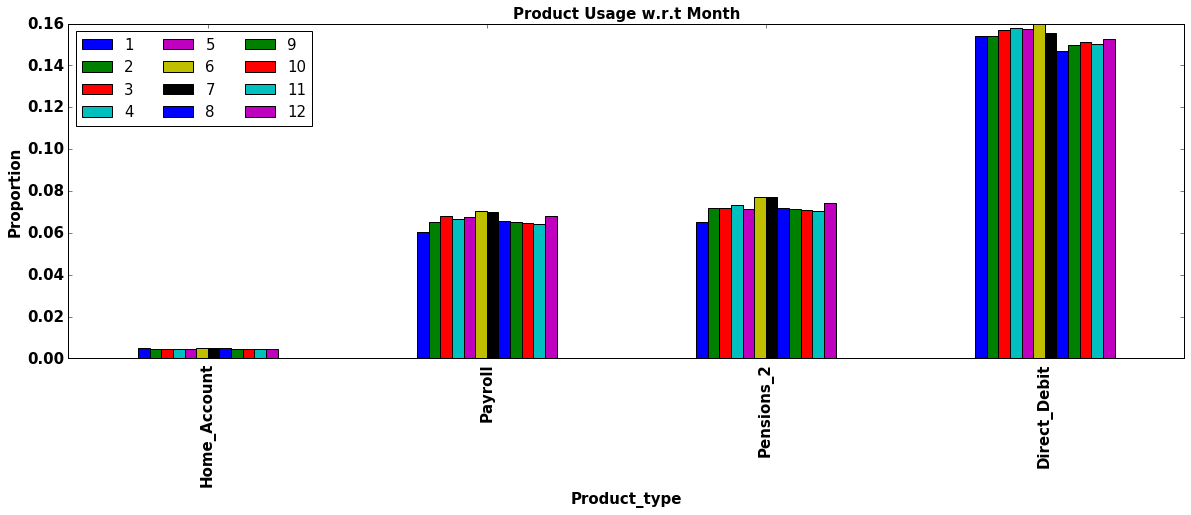

In [83]:
list_residency_7=list_residency_2[20:]
df.groupby(df['Partition_Column'].dt.month)[list_residency_7].apply(lambda x : x.sum()/x.count()).unstack().unstack().plot(kind='bar')
plt.title('Product Usage w.r.t Month',fontsize=15,fontweight='bold')
plt.xlabel("Product_type",fontsize=15,fontweight='bold')
plt.ylabel("Proportion",fontsize=15,fontweight='bold')
plt.xticks(fontsize=15,fontweight='bold')
plt.yticks(fontsize=15,fontweight='bold')
plt.legend(fontsize=15,loc=2,ncol=3)